# Results - Regression on Real-world Data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berni-lehner/structural_health_monitoring/blob/main/notebooks/mixed_regression_results.ipynb)

## Prerequisites

In [1]:
%load_ext rich
%load_ext autoreload
%autoreload 2
%matplotlib inline

from rich import print

random_state = 42

In [2]:
import sys
import os
import time
import glob
from pathlib import Path
import sklearn
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


# initialize environment, paths, etc...
IN_COLAB = 'google.colab' in sys.modules

if(IN_COLAB):
    # uncomment in case you want to start from scratch in Colab
    !rm -rf /content/structural_health_monitoring  
    !git clone https://github.com/berni-lehner/structural_health_monitoring.git
    !pip install -r /content/structural_health_monitoring/requirements.txt
    
    # this is Colab specific, and only a manual "Run all" will cause the
    # installation to be finished
    if(pd.__version__ != '1.4.2'):
      print('Stopping RUNTIME! Please run again to finish installation.')
      os.kill(os.getpid(), 9)

    DATA_PATH = Path(r"/content/structural_health_monitoring/data")
    sys.path.insert(0, "/content/structural_health_monitoring/src")
else:
    DATA_PATH = Path(r"../data/")
    sys.path.insert(0,"../src")
    
    
sys.path.insert(0, DATA_PATH)
SYN_DATA_PATH = Path(DATA_PATH, "synthetic")
REAL_DATA_PATH = Path(DATA_PATH, "real_world")
RESULT_PATH = Path(DATA_PATH, "results")
if not os.path.isdir(RESULT_PATH):
    os.makedirs(RESULT_PATH)

try:
    from zippeekiyay import namelist
except ImportError or ModuleNotFoundError:
    print('installing zippee-ki-yay...')
    !pip install git+https://github.com/berni-lehner/zippee-ki-yay.git

    from zippeekiyay import namelist

CALIBRATION_FILE = Path(REAL_DATA_PATH, "calibration.pkl")

In [3]:
from plot_utils import (
    init_plotting,
    plot_metrics,
    plot_metrics_bar,
    get_metrics_summary,
    plot_cv_indices)

# configure fonts, etc...
init_plotting()

from scoring_utils import (
    get_synth_regression_scoring,
    SHM_Scoring)

from bench_utils import extract_metrics

## Data Loading

In [4]:
base = "20_mixed_regression_AB_dssize.pkl"
base = Path(RESULT_PATH, base)

base = pd.read_pickle(base)

In [5]:
res = "10_mixed_regression_AB_undersampling.pkl"
res = Path(RESULT_PATH, res)

res = pd.read_pickle(res)

### Combine results from baseline and our models

In [6]:
results = pd.concat(
    [
        base,
        # res[(res["model"] == "RandomUnderSampler")],
    ],
    ignore_index=True,
)

In [7]:
# source columns
shm_scoring = SHM_Scoring()

mse_individual = ["test_mse_0.0"] + shm_scoring.REAL_MSE_RESULTS
mse_individual


[
    'test_mse_0.0',
    'test_mse_1.5',
    'test_mse_2.5',
    'test_mse_3.5',
    'test_mse_4.5',
    'test_mse_5.5',
    'test_mse_7.0',
    'test_mse_8.0',
    'test_mse_10.0',
    'test_mse_12.0',
    'test_mse_14.0',
    'test_mse_16.0',
    'test_mse_17.0',
    'test_mse_19.0',
    'test_mse_21.0',
    'test_mse_23.0',
    'test_mse_25.0',
    'test_mse_27.0',
    'test_mse_29.0',
    'test_mse_31.0',
    'test_mse_33.0',
    'test_mse_35.0',
    'test_mse_37.0',
    'test_mse_39.0',
    'test_mse_40.0'
]

In [8]:
# target columns
mse_contr_individual = [item.replace('test_mse_', 'mse_contr_') for item in mse_individual]
mse_contr_individual


[
    'mse_contr_0.0',
    'mse_contr_1.5',
    'mse_contr_2.5',
    'mse_contr_3.5',
    'mse_contr_4.5',
    'mse_contr_5.5',
    'mse_contr_7.0',
    'mse_contr_8.0',
    'mse_contr_10.0',
    'mse_contr_12.0',
    'mse_contr_14.0',
    'mse_contr_16.0',
    'mse_contr_17.0',
    'mse_contr_19.0',
    'mse_contr_21.0',
    'mse_contr_23.0',
    'mse_contr_25.0',
    'mse_contr_27.0',
    'mse_contr_29.0',
    'mse_contr_31.0',
    'mse_contr_33.0',
    'mse_contr_35.0',
    'mse_contr_37.0',
    'mse_contr_39.0',
    'mse_contr_40.0'
]

In [9]:
results

,fit_time,score_time,estimator,test_r2 avg,test_neg_mean_squared_error avg,test_r2_0.0,test_r2_1.5,test_r2_2.5,test_r2_3.5,test_r2_4.5,...,test_abs_err_23.0,test_abs_err_25.0,test_abs_err_27.0,test_abs_err_29.0,test_abs_err_31.0,test_abs_err_33.0,test_abs_err_35.0,test_abs_err_37.0,test_abs_err_39.0,test_abs_err_40.0
0,0.047387,0.145468,(FunctionTransformer(func=<function _to_numpy ...,0.989396,-1.687200,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
1,0.039713,0.139730,(FunctionTransformer(func=<function _to_numpy ...,0.989239,-1.712178,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
2,0.050885,0.151492,(FunctionTransformer(func=<function _to_numpy ...,0.989368,-1.691733,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
3,0.010443,0.050863,(FunctionTransformer(func=<function _to_numpy ...,0.989104,-1.733689,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
4,0.007238,0.033160,(FunctionTransformer(func=<function _to_numpy ...,0.989364,-1.692400,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.496454,0.030617,(FunctionTransformer(func=<function _to_numpy ...,0.989370,-1.691333,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
188,1.489663,0.030727,(FunctionTransformer(func=<function _to_numpy ...,0.989364,-1.692400,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
189,1.494588,0.031145,(FunctionTransformer(func=<function _to_numpy ...,0.989370,-1.691333,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
190,1.476257,0.032259,(FunctionTransformer(func=<function _to_numpy ...,0.989374,-1.690667,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0


In [10]:
full_mse = results[mse_individual].sum(axis=1) / len(mse_individual)

for col in results[mse_individual]:
    tmp = results[col] * 100 / len(mse_individual) / full_mse
    results[col.replace("test_mse_", "mse_contr_")] = tmp

# sanity check, all contributions have to sum up to 100% every time for each defect
assert results[mse_contr_individual].sum(axis=1).sum() / len(results) == 100

## Plot MSE

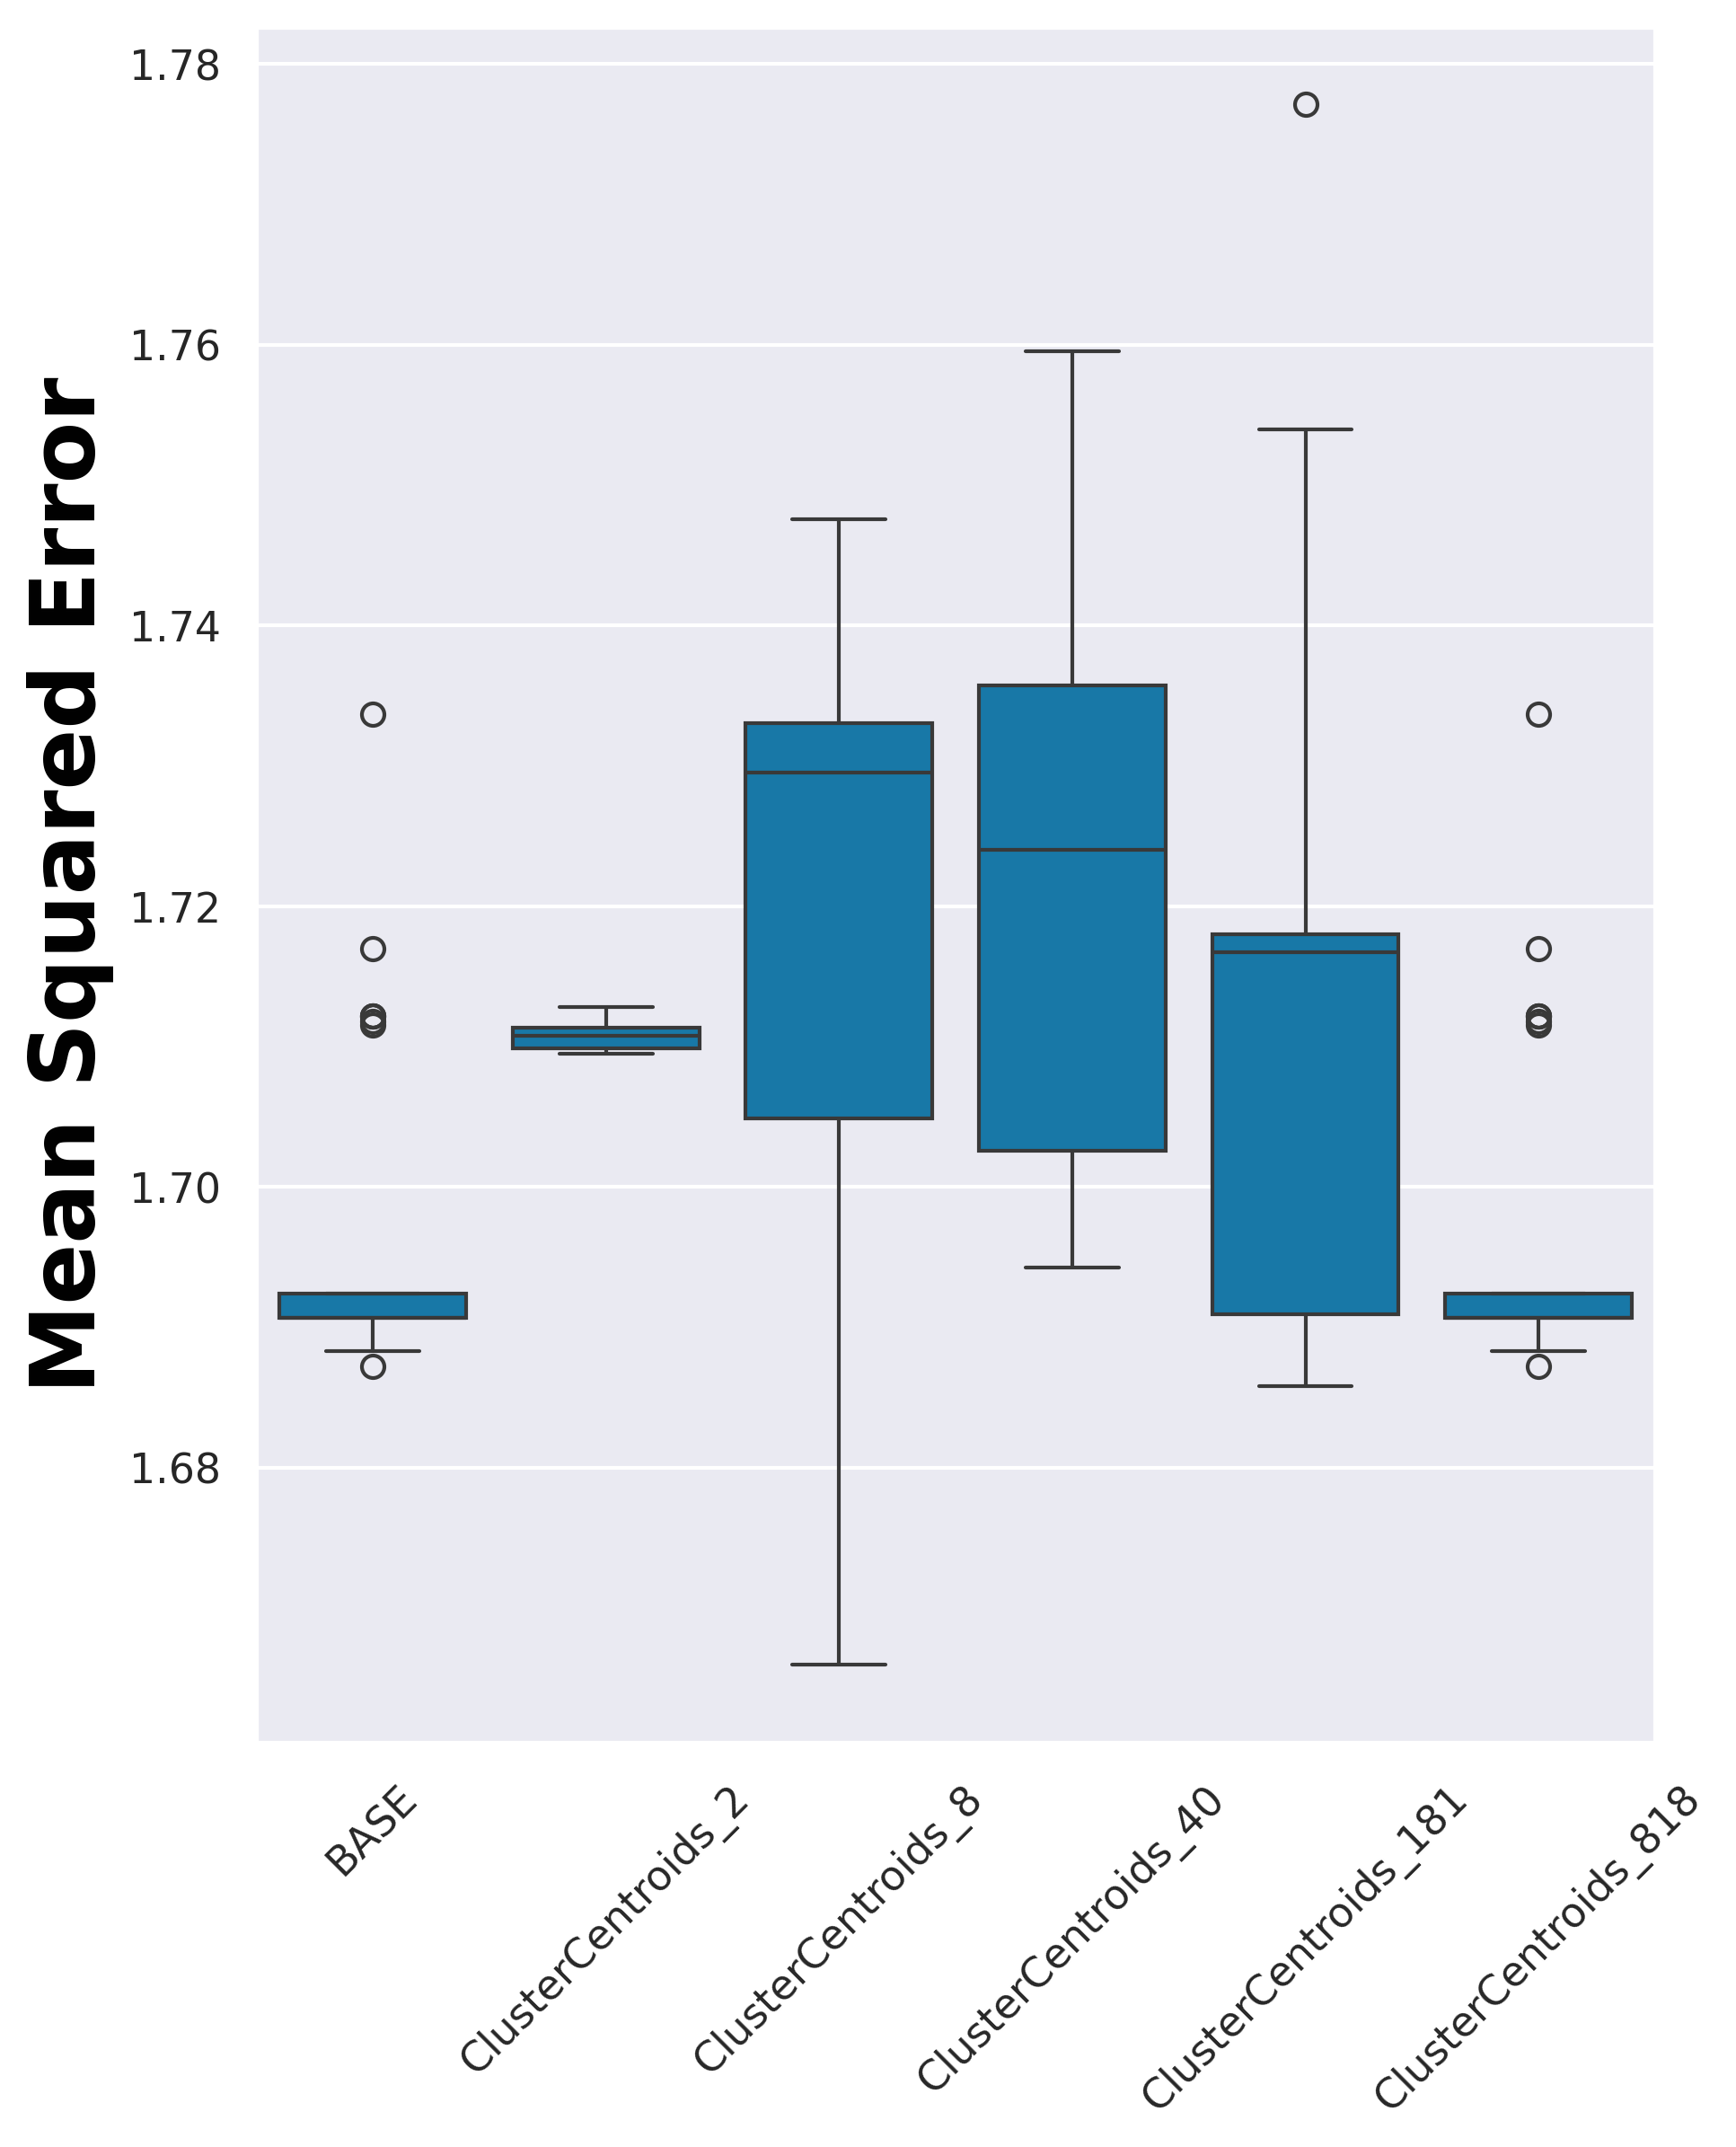

In [11]:
sns.set(rc={"figure.figsize": (6.7, 8.27)})
axis_font = {  #'family': 'Times',
    "color": "black",
    "weight": "bold",
    "size": 24,
}

fig = plot_metrics(
    extract_metrics(results, ["test_mse_0.0_40.0"]),
    palette="winter",
    # errwidth=3.5,
    # capsize=0.4,
    # width=0.8,
)

plt.ylabel("Mean Squared Error", fontdict=axis_font)
plt.xlabel("")
fig.get_legend().remove()

plt.xticks(rotation=45)
# plt.ylim((1.5, 4))
fname = Path(RESULT_PATH, r"20_undersampling_params.pdf")
plt.savefig(fname, bbox_inches="tight")
plt.show()

## Plot MSE wrt Defect Size

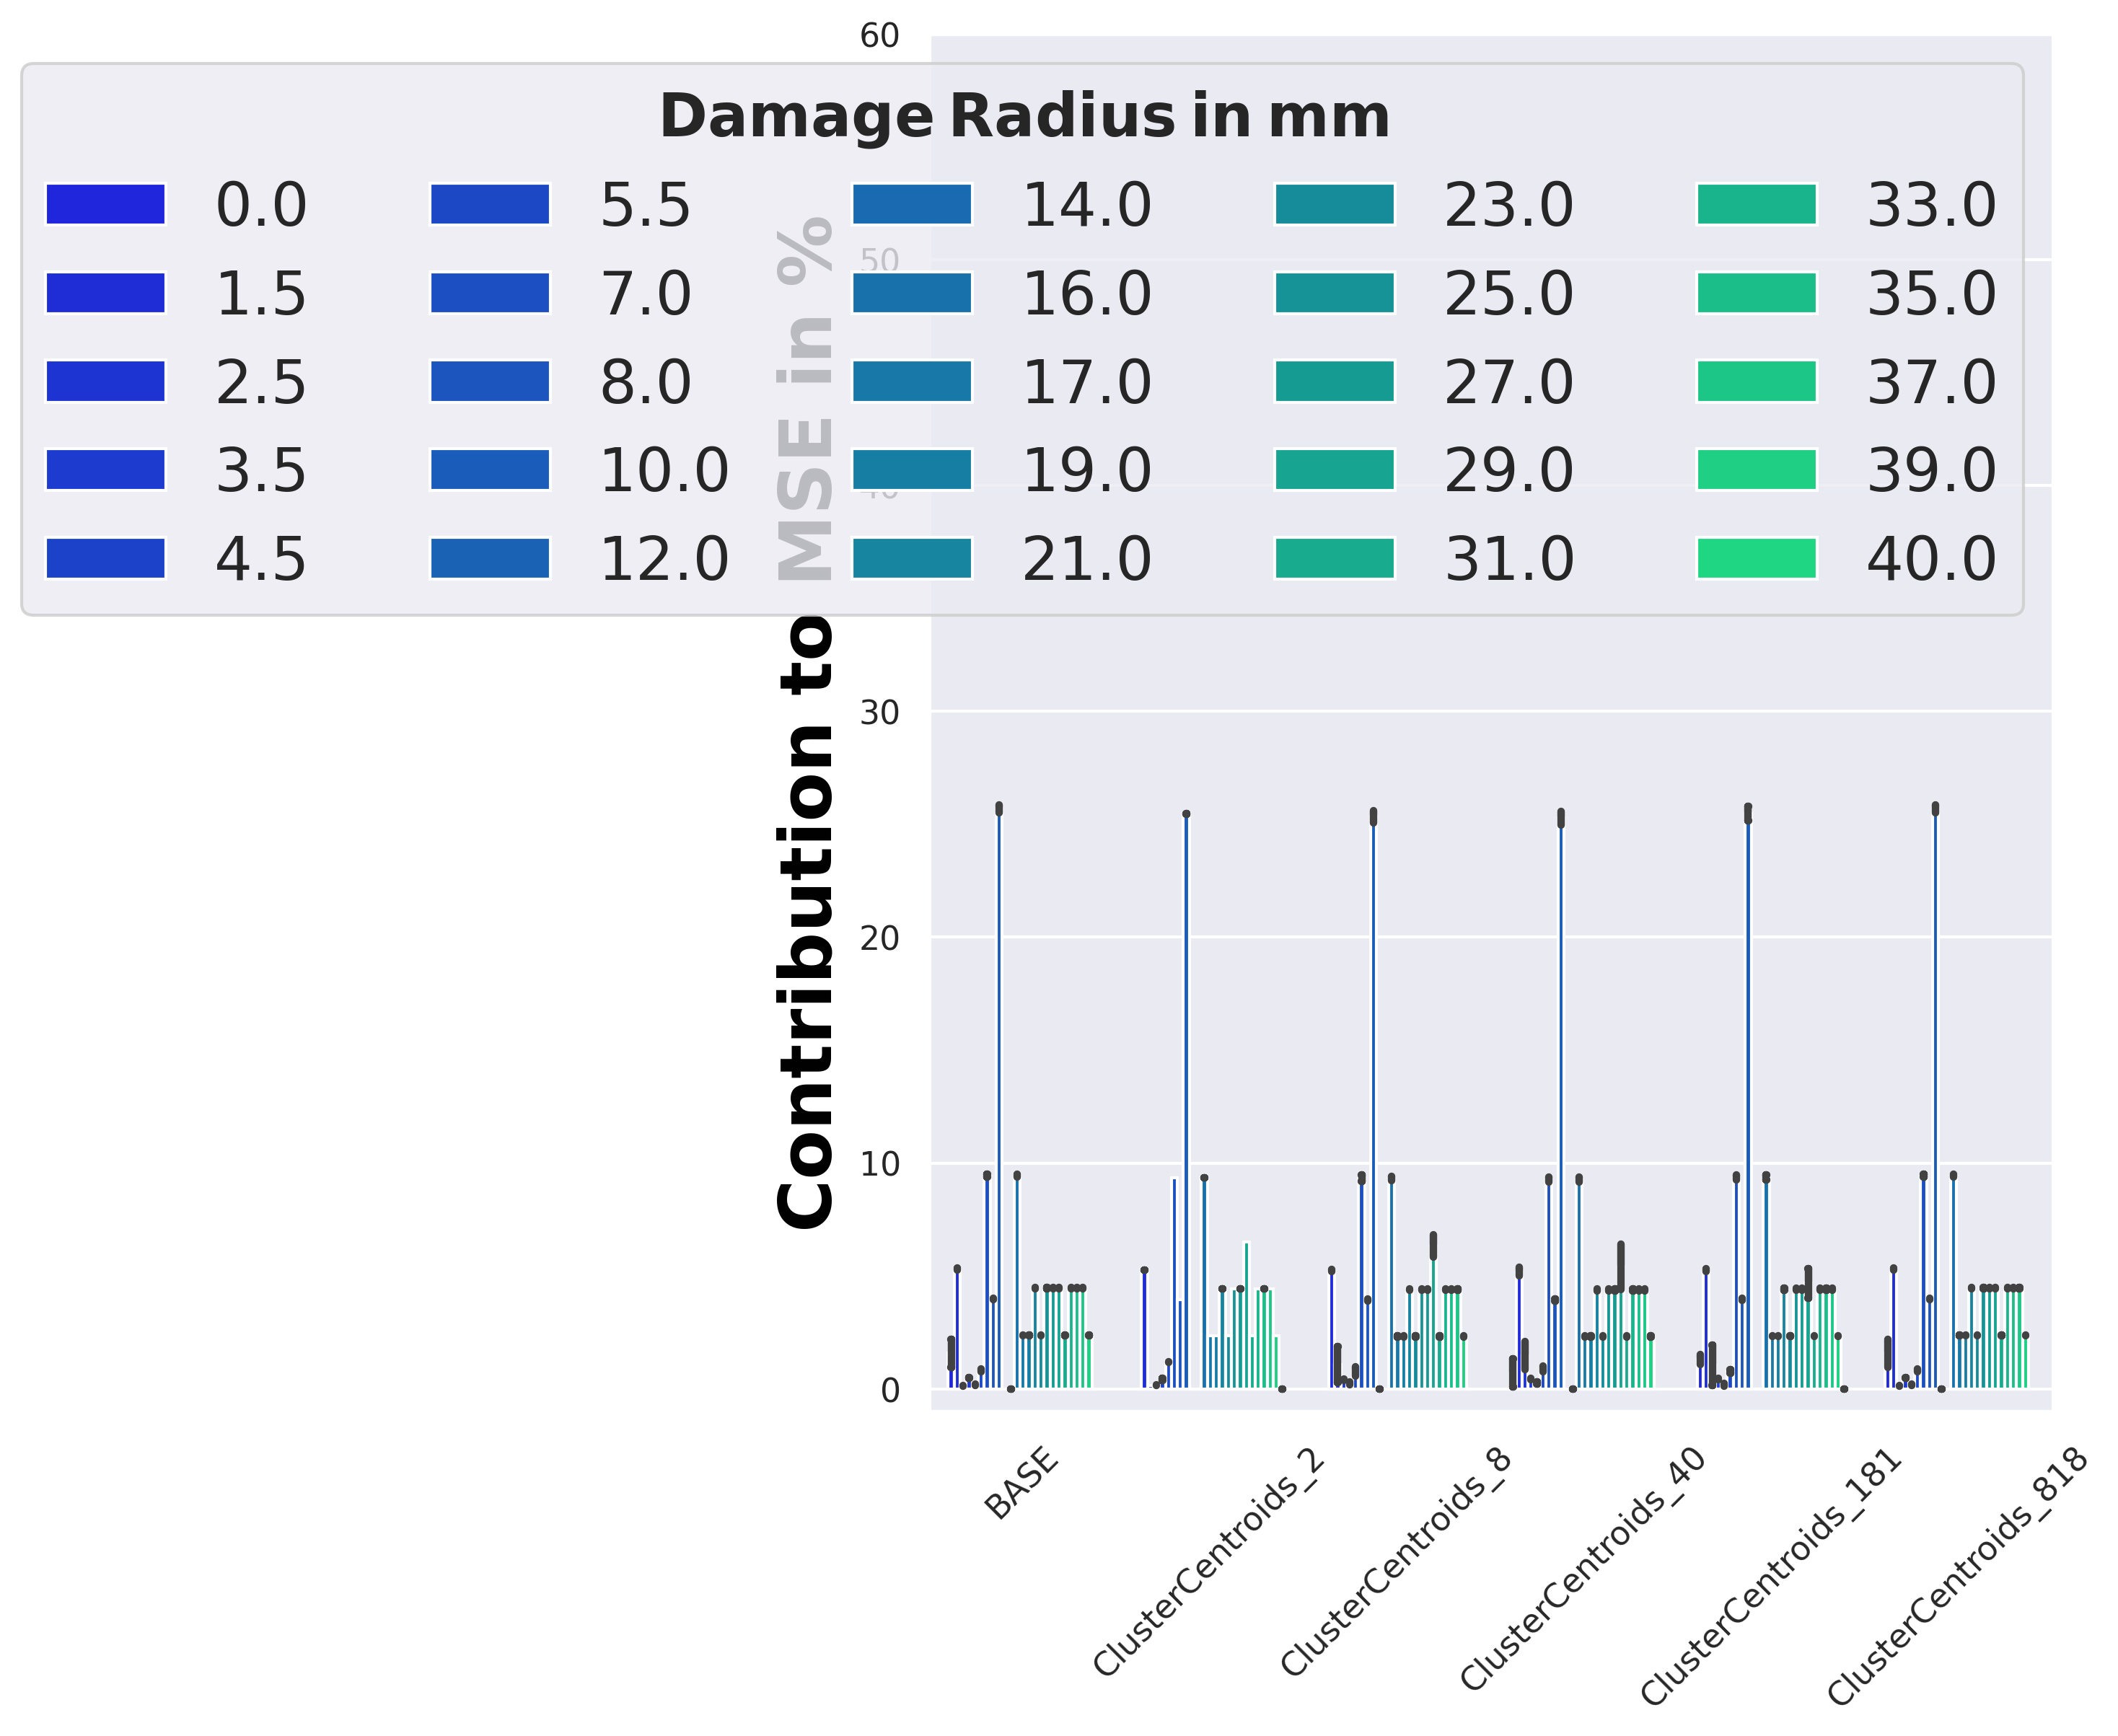

In [12]:
fig = plot_metrics_bar(
    extract_metrics(results, mse_contr_individual),
    palette="winter",
    errwidth=2.5,
    capsize=0.03,
)

plt.ylim((-1, 60))
plt.ylabel("Contribution to MSE in %", fontdict=axis_font)
plt.xlabel("")

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [item.replace("mse_contr_", "") for item in labels]
plt.legend(
    handles,
    new_labels,
    ncol=5,
    loc="best",
    title="$\\bf{Damage \:Radius} \:in\:mm$",
    title_fontsize=20,
    fontsize=20,
)

plt.xticks(rotation=45)
fname = Path(RESULT_PATH, r"20_undersampling_params_mse_individual_contribution.pdf")
plt.savefig(fname, bbox_inches="tight")
plt.show()

In [13]:
df = extract_metrics(results, ['test_mse_0.0_40.0'])
print(get_metrics_summary(df))

mean       std
model                metrics                              
BASE                 test_mse_0.0_40.0  1.696229  0.011147
ClusterCentroids_181 test_mse_0.0_40.0  1.710444  0.021164
ClusterCentroids_2   test_mse_0.0_40.0  1.710715  0.000879
ClusterCentroids_40  test_mse_0.0_40.0  1.724153  0.020779
ClusterCentroids_8   test_mse_0.0_40.0  1.719226  0.018249
ClusterCentroids_818 test_mse_0.0_40.0  1.696229  0.011147

## Plot Train/Inference times

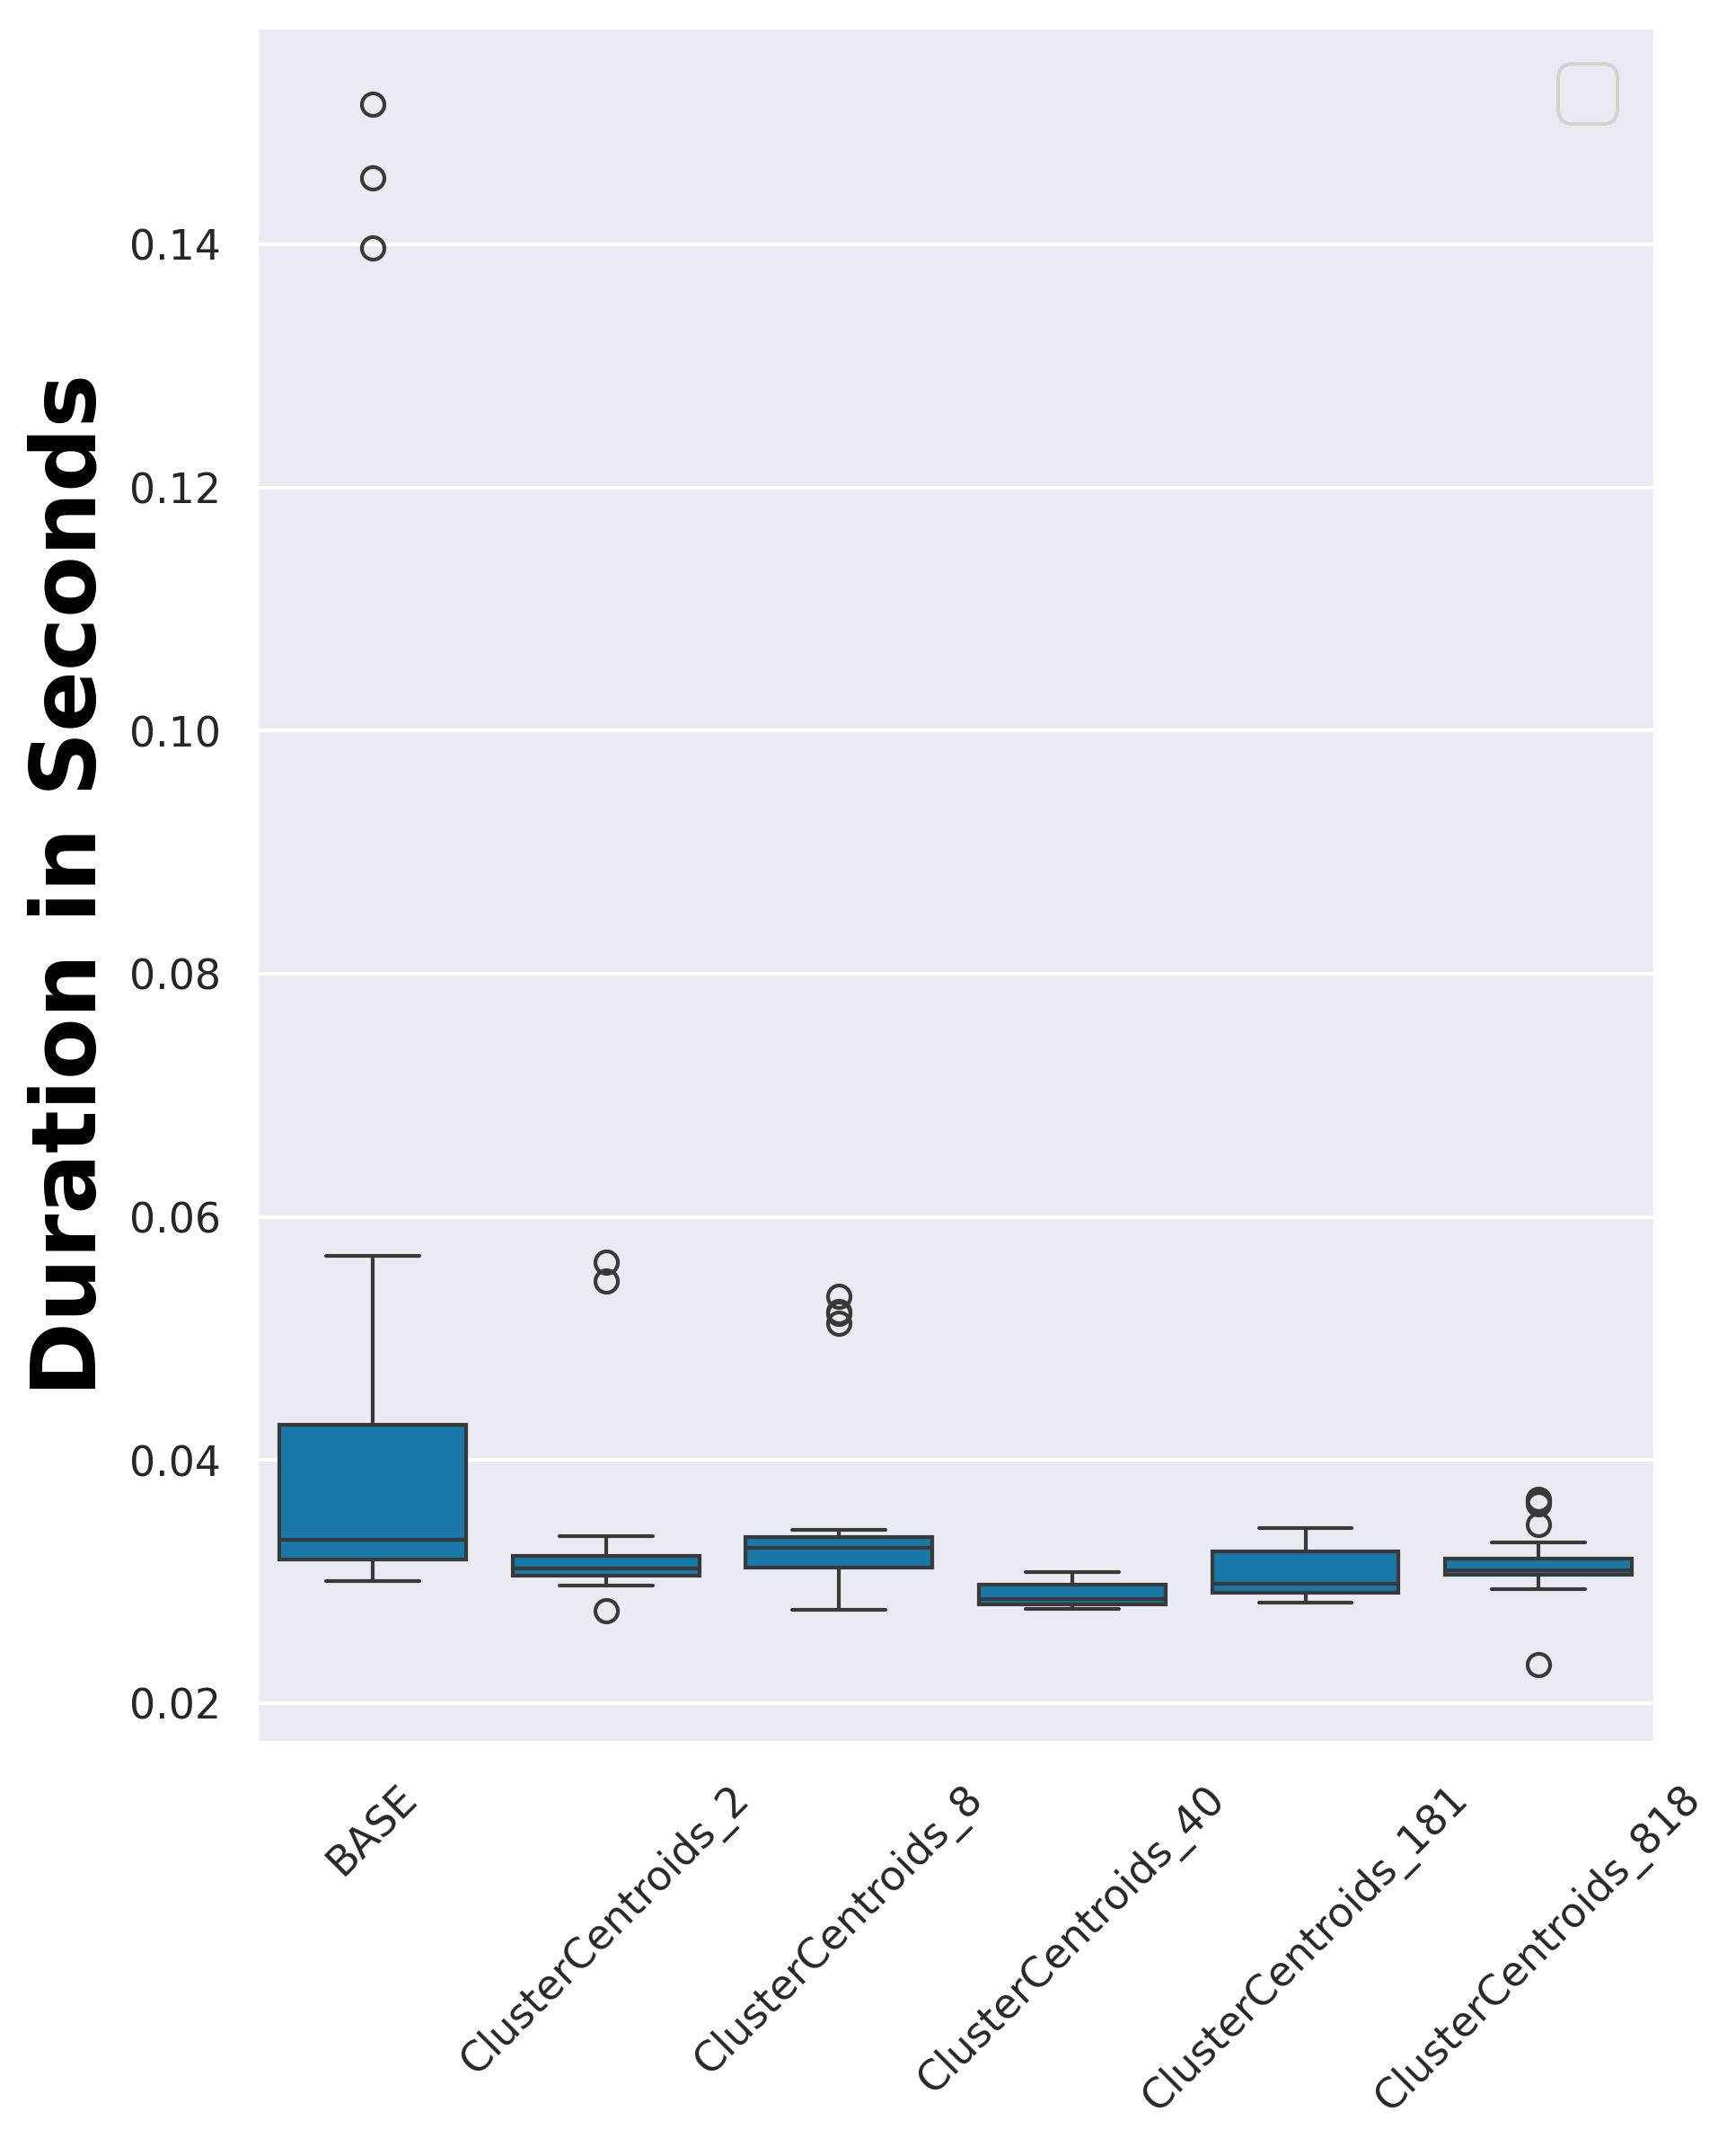

In [14]:
fig = plot_metrics(
    extract_metrics(results, ["score_time"]),
    palette="winter",
    # errwidth=2.5,
    # capsize=0.03,
)

# plt.ylim((-1, 60))
plt.ylabel("Duration in Seconds", fontdict=axis_font)
plt.xlabel("")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles,
    [],
    ncol=5,
    loc="best",
    title="",
    title_fontsize=20,
    fontsize=20,
)

plt.xticks(rotation=45)
fname = Path(RESULT_PATH, r"20_undersampling_params_time.pdf")
plt.savefig(fname, bbox_inches="tight")
plt.show()

In [15]:
df = extract_metrics(results, ["fit_time", "score_time"])
print(get_metrics_summary(df))

mean       std
model                metrics                       
BASE                 fit_time    0.010092  0.011916
                     score_time  0.047116  0.033020
ClusterCentroids_181 fit_time    0.485459  0.009111
                     score_time  0.030466  0.001801
ClusterCentroids_2   fit_time    0.084302  0.011138
                     score_time  0.032701  0.006088
ClusterCentroids_40  fit_time     0.17873  0.006350
                     score_time  0.028893  0.000868
ClusterCentroids_8   fit_time    0.121774  0.008733
                     score_time  0.034409  0.007079
ClusterCentroids_818 fit_time    1.572042  0.143144
                     score_time  0.031534  0.002615